In [102]:
import pandas as pd
import numpy as np
from sklearn import model_selection, metrics, preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN, AgglomerativeClustering
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data/snsdata.csv')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [5]:
# оставляем нужные столбцы
data = data.iloc[:, 4:]
data.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [9]:
# размер датасета
X = data.copy()
print(data.shape)

(30000, 36)


In [10]:
# номрализуем данные
scale = preprocessing.StandardScaler()
X_norm = scale.fit_transform(X)
print(X_norm[0][0])

-0.3322172643985876


In [12]:
kmean = KMeans(n_clusters=9, random_state=42)
kmean.fit(X_norm)
kmean.inertia_

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


856276.696246784

In [15]:
pd.Series(kmean.labels_).value_counts()

1    19599
2     4284
0     2201
4      941
3      902
5      851
8      754
7      467
6        1
dtype: int64

In [16]:
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

In [17]:
list_iner = []
for i in range(3, 10):
    list_iner.append(get_inertia(i, X_norm))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.

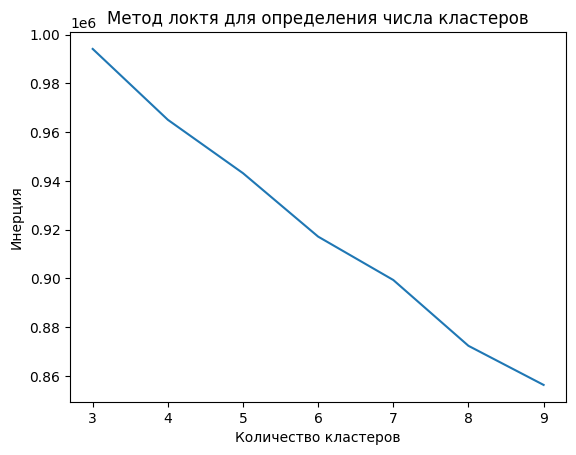

In [20]:
# построим график для метода локтя
sns.lineplot(x=range(3, 10), y=list_iner).set(
    title='Метод локтя для определения числа кластеров', 
    xlabel = 'Количество кластеров',
    ylabel = 'Инерция');

In [21]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = metrics.silhouette_score(X, k_means.labels_)
    return silhouette

In [22]:
silhouette = []
for clust_num in range(3, 10):
    silhouette.append(get_silhouette(clust_num, X_norm))

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.

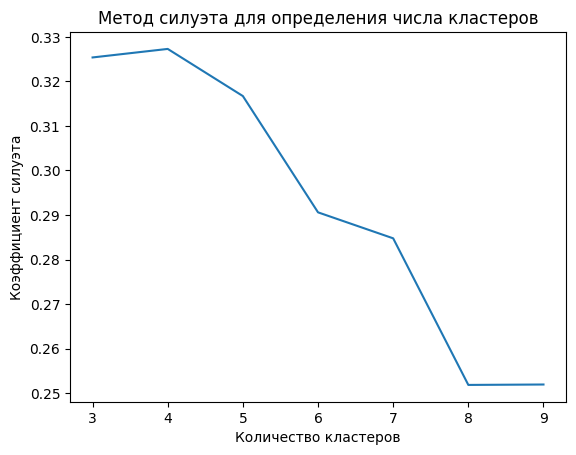

In [23]:
# построим график для метода силуэта
sns.lineplot(x=range(3, 10), y=silhouette).set(
    title='Метод силуэта для определения числа кластеров', 
    xlabel = 'Количество кластеров',
    ylabel = 'Коэффициент силуэта');

In [25]:
# проведем кластеризацию на 3 кластерах
kmean_3 = KMeans(n_clusters=3, random_state=42)
kmean_3.fit(X_norm)

C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [26]:
# добавим столбце с кластерами в датасет
data['label'] = kmean_3.labels_

In [37]:
data.groupby('label')

In [51]:
top_list = []
for row in data['label'].unique():
    top_10 = set(data.groupby('label').mean().iloc[row, :].sort_values(ascending=False).head(10).index)
    top_list.append(top_10)

set.intersection(*top_list)

{'dance', 'god', 'hair', 'music'}

In [52]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X_norm)
y = gm.predict(X_norm)

In [58]:
# подсчет количества уникальных записей в массиве
np.unique(y, return_counts=True)

(array([0, 1, 2], dtype=int64), array([20670,  2874,  6456], dtype=int64))

In [53]:
data['label_gm'] = y

In [57]:
data.groupby('label_gm')['basketball'].count()

label_gm
0    20670
1     2874
2     6456
Name: basketball, dtype: int64

# ИТОГОВАЯ ПРАКТИКА ПО КЛАСТЕРИЗАЦИИ

In [60]:
data_bank = pd.read_csv('data/CC GENERAL.csv')
data_bank.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [62]:
# проверим данные на пропуски
data_bank.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [63]:
# заполним пропуски
data_bank['CREDIT_LIMIT'] = data_bank['CREDIT_LIMIT'].fillna(data_bank['CREDIT_LIMIT'].mean())
data_bank['MINIMUM_PAYMENTS'] = data_bank['MINIMUM_PAYMENTS'].fillna(data_bank['MINIMUM_PAYMENTS'].mean())
print(data_bank['MINIMUM_PAYMENTS'].mean().round(2))

864.21


In [65]:
# удалим лишний столбец с id клиента
X = data_bank.drop('CUST_ID', axis=1)

In [66]:
# нормализуем данные
scale = preprocessing.StandardScaler()
scale.fit(X)
X_norm = scale.transform(X)
print(X_norm[0][0])

-0.7319893664465486


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.

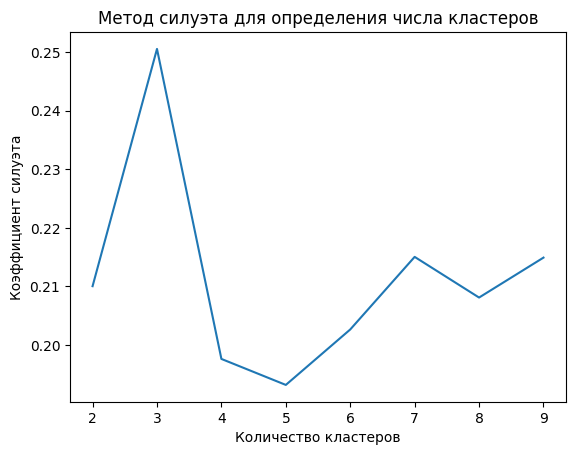

In [67]:
# рассчитаем коэффициенты силуэта
silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X_norm))

# построим график
sns.lineplot(x=range(2, 10), y=silhouette).set(
    title='Метод силуэта для определения числа кластеров', 
    xlabel = 'Количество кластеров',
    ylabel = 'Коэффициент силуэта');

In [69]:
kmean_bank = KMeans(n_clusters=3, random_state=42)
kmean_bank.fit(X_norm)
print(np.unique(kmean_bank.labels_, return_counts=True))

(array([0, 1, 2]), array([1596, 1235, 6119], dtype=int64))


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [74]:
clust = DBSCAN()
clust.fit(X_norm)
print(np.unique(clust.labels_, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37], dtype=int64), array([6627, 1698,    8,   34,   11,    6,  234,    9,   13,   23,   14,
          8,   60,    7,    6,    6,   23,   18,   30,    5,    7,    5,
          7,    5,    9,    5,    6,    5,    5,    8,    7,    5,   10,
          5,    5,    4,    3,    4,    5], dtype=int64))


In [75]:
silhouette_2 = []
eps_list = []
min_samples_list = []
for eps in np.arange(0.1,3,0.2):
    for min_samples in range(1,20,4):
        clust = DBSCAN(eps=eps, min_samples=min_samples)
        clust.fit(X_norm)
        silhouette = metrics.silhouette_score(X_norm, clust.labels_)
        silhouette_2.append(silhouette)
        eps_list.append(eps)
        min_samples_list.append(min_samples)

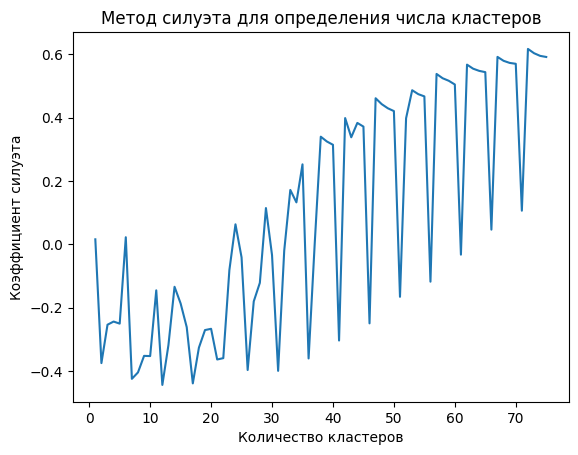

In [78]:
# построим график
sns.lineplot(x=range(1, len(silhouette_2)+1), y=silhouette_2).set(
    title='Метод силуэта для определения числа кластеров', 
    xlabel = 'Количество кластеров',
    ylabel = 'Коэффициент силуэта');

In [92]:
print(np.round(np.max(silhouette_2), 2))
print(np.round(eps_list[silhouette_2.index(np.max(silhouette_2))], 2))
print(min_samples_list[silhouette_2.index(np.max(silhouette_2))])

0.62
2.9
5


In [99]:
silhouette_ac = []
for i in range(3, 10):
    ac = AgglomerativeClustering(n_clusters=i).fit(X_norm)
    silhouette = metrics.silhouette_score(X_norm, ac.labels_)
    silhouette_ac.append(silhouette)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64), array([ 864,  464, 2320,   76,   23,  722, 1514, 2356,  611], dtype=int64))


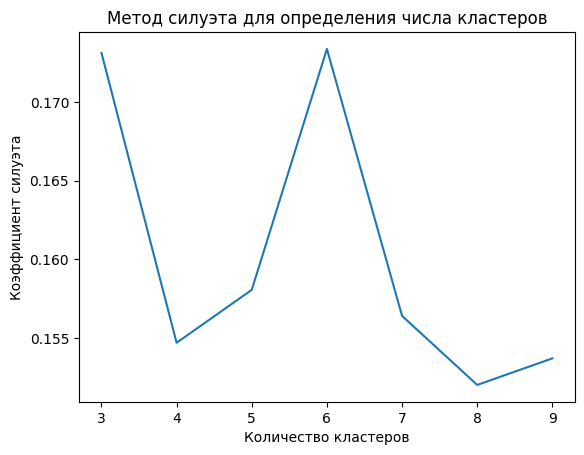

In [100]:
print(np.unique(ac.labels_, return_counts=True))
# построим график
sns.lineplot(x=range(3, 10), y=silhouette_ac).set(
    title='Метод силуэта для определения числа кластеров', 
    xlabel = 'Количество кластеров',
    ylabel = 'Коэффициент силуэта');

In [101]:
ac_opt = AgglomerativeClustering(n_clusters=6).fit(X_norm)
print(np.unique(ac_opt.labels_, return_counts=True))

(array([0, 1, 2, 3, 4, 5], dtype=int64), array([3946, 2931,  864,  464,   23,  722], dtype=int64))


C:\Users\vadim.kopytko\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


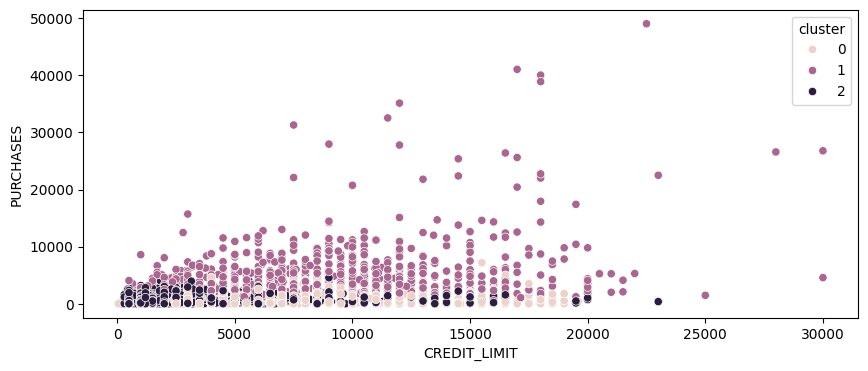

In [106]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_norm)
data_bank['cluster'] = kmeans.labels_
plt.figure(figsize=(10,4))
sns.scatterplot(data=data_bank, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show();